# Data Visualization Assignment

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

### Create a dataframe and a dictionary to store data from 5 countries/files

In [118]:
files = [
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jam--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tls--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vgb--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ukr--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-mlt--age--gender--year.csv"
] 

countries = ["jam","tls","vgb","ukr","mlt"]
dic = {}
full_data = pd.DataFrame()
for file, country in zip(files, countries):
    pf = pd.read_csv(file)
    dic[country] = pf

    full_data = pd.concat([full_data,pf])
    
print(full_data)


      country  age  gender  year  population
0         jam    0       1  1950       20660
1         jam    0       1  1951       22276
2         jam    0       1  1952       23198
3         jam    0       1  1953       24094
4         jam    0       1  1954       25168
...       ...  ...     ...   ...         ...
30497     mlt   99       2  2096         904
30498     mlt   99       2  2097         855
30499     mlt   99       2  2098         815
30500     mlt   99       2  2099         798
30501     mlt   99       2  2100         762

[152510 rows x 5 columns]


## Part 1: Matplotlib
### Problem 1:

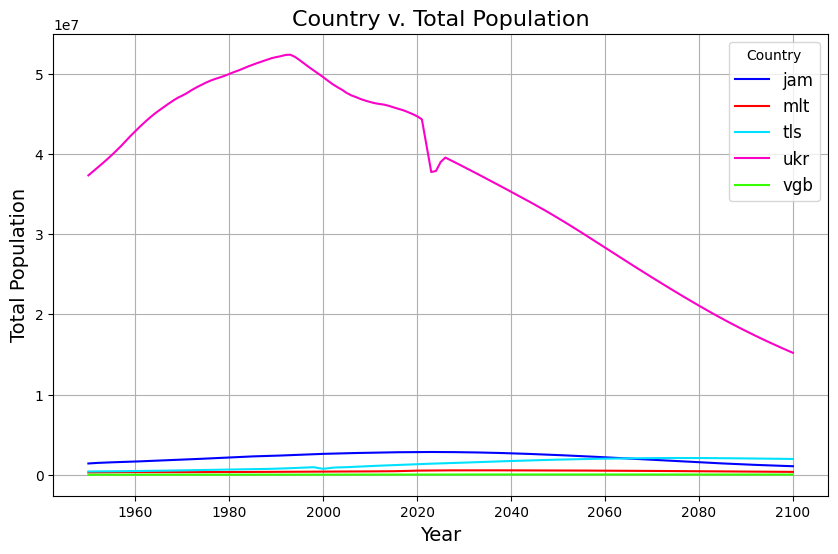

In [165]:
# Group by year and country and sum population
yearly_total = full_data.groupby(['country','year'])['population'].sum().reset_index()
# Set the graph size
plt.figure(figsize=(10, 6))

# Group data by countries, and then add the data to the plot
# Add colors for each line
colors = ["blue","red","#00e1ff","#fa02c8","#33ff00"]
for country, single_color in zip(yearly_total['country'].unique(), colors):
    country_data = yearly_total[yearly_total['country'] == country]
    plt.plot(country_data['year'], country_data['population'], label=country, color = single_color)

# Add X, Y axis and titles
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Population', fontsize=14)
plt.title('Country v. Total Population', fontsize=16)

# Add legends and grids for clearer visualization
plt.legend(title='Country', fontsize=12)
plt.grid(True)

plt.show()

## Part 1: Matplotlib
### Problem 2:

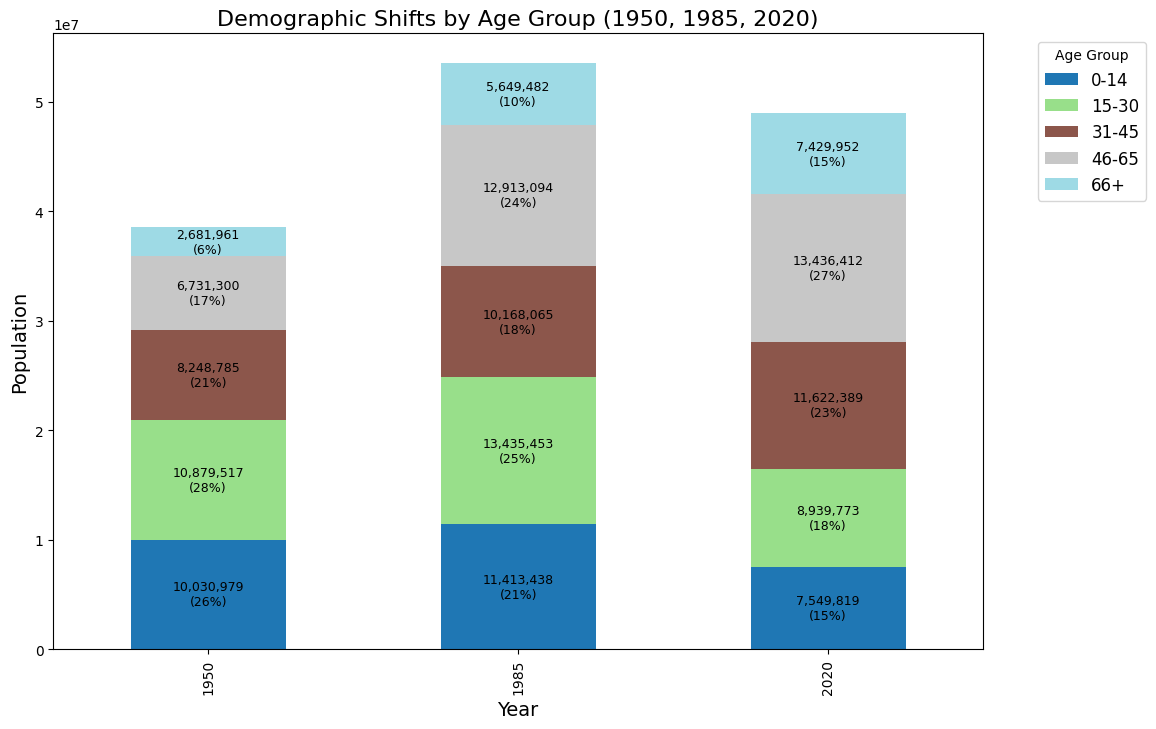

In [171]:
# Add age divisions and labels for each age groups
bins = [0, 14, 30, 45, 65, 100] 
labels = ['0-14', '15-30', '31-45', '46-65', '66+'] 

# Sort the data with pd.cut and bins previously defined
full_data['Age Group'] = pd.cut(full_data['age'], bins=bins, labels=labels)

# Group the cutted data with year and age groups
full_data_grouped = full_data.groupby(['year', 'Age Group'], observed=False)['population'].sum().reset_index()

# Set the year range that the graph will show
ranged_df = full_data_grouped[full_data_grouped['year'].isin([1950, 1985, 2020])]

# Use pivot function to group the data from different columns to one column
pivot_df = ranged_df.pivot(index='year', columns='Age Group', values='population')

# Set the type of the bar graph(if stack is false, then the graph will be grouped bar chart)
stacked_bar_chart = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add X,Y axis labels, and titles of the three years
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title('Demographic Shifts by Age Group (1950, 1985, 2020)', fontsize=16)

# Add in graph numbers in each stack for better visualziation
# Calculate totals and prepare for annotations
total_population_per_year = pivot_df.sum(axis=1)
bottom_values = pd.DataFrame(0, 
                           index=pivot_df.index, 
                           columns=pivot_df.columns)

# Use double loop to calculate each stack's percentage inside of each column
# Calculate the heights for each year groups
for ind, col in enumerate(pivot_df.columns):
    current_values = pivot_df[col]
    
    # For each bar in this age group
    for year_idx, year in enumerate(pivot_df.index):
        height = current_values[year]
        bottom = bottom_values.iloc[year_idx].sum()
        
        if height > 0:  
            percentage = (height / total_population_per_year[year]) * 100
            
            # Format the annotation text
            text_inside = f'{int(height):,}\n({int(percentage):}%)'
            
            # Properly center the text
            center_x = year_idx
            center_y = bottom + (height / 2)
            
            # Add annotation
            stacked_bar_chart.text(center_x, center_y, text_inside,
                   ha='center', va='center', fontsize=9, color='black')
        
        # Update bottom values for the next iteration
        bottom_values.iloc[year_idx, ind] = height
# Add legends for better visualization
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()



## Part 2: Seaborn
### Problem 1:

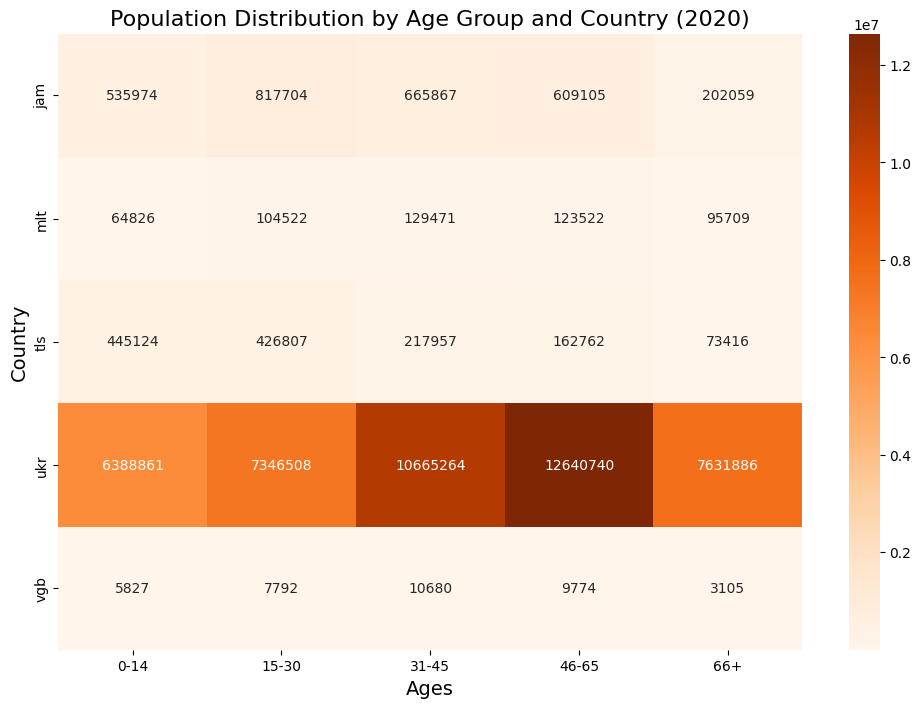

In [196]:
# Only use the data from 2020
data_2020 = full_data.loc[full_data['year'] == 2020].copy()

# Create bins and labels to cut the data into groups 
bins = [0, 14, 30, 45, 65, 100]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']
data_2020['Ages'] = pd.cut(data_2020['age'], bins=bins, labels=labels, right=False)

# Group the data with country and ages
heatmap_data = data_2020.groupby(['country', 'Ages'],observed=False)['population'].sum().unstack().fillna(0)

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))
my_heat_map= sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Oranges')

# Add labels and title for better visualization
plt.xlabel('Ages', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Population Distribution by Age Group and Country (2020)', fontsize=16)

plt.show()


- This heatmap provides clear visualization about the population trend by having the age group with more people with denser colors.
- With the heatmap, I can clearly see a couple things:
1. UKR has a problem with population aging since most people in that country lies in 46-65 age region.
2. Jam has way more young/middle age population than the 66+ population.
3. TLS has a great population of the younger generations, which could indicate that the contry is doing well economically.

## Part 2: Seaborn
### Problem 2:

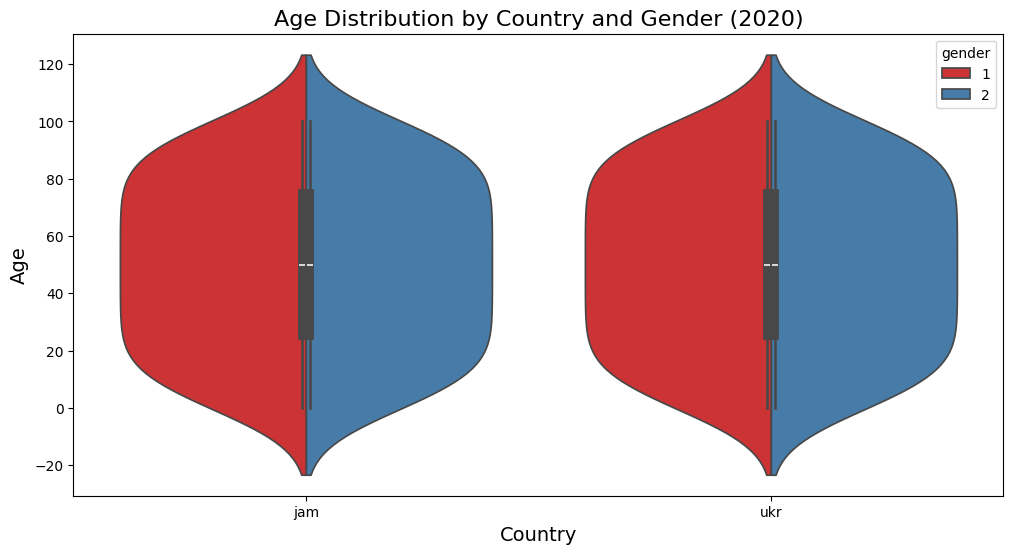

In [218]:
# Extract only the 2015 data from JAM and UKR
data_pairs = full_data[(full_data['year'] == 2015) & (full_data['country'].isin(['jam', 'ukr']))]

# Set the graph size
plt.figure(figsize=(12, 6))

# Create the violin plot and compare the gender of each country by age
sns.violinplot(data=data_pairs, x='country', y='age', hue='gender', split=True, palette='Set1')

# Add X, Y axis labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age Distribution by Country and Gender (2020)', fontsize=16)

plt.show()

By look at this plot, I can see that JAM and UKR both have a very even ratio between the genders.

## Part 2: Seaborn
### Problem 3:

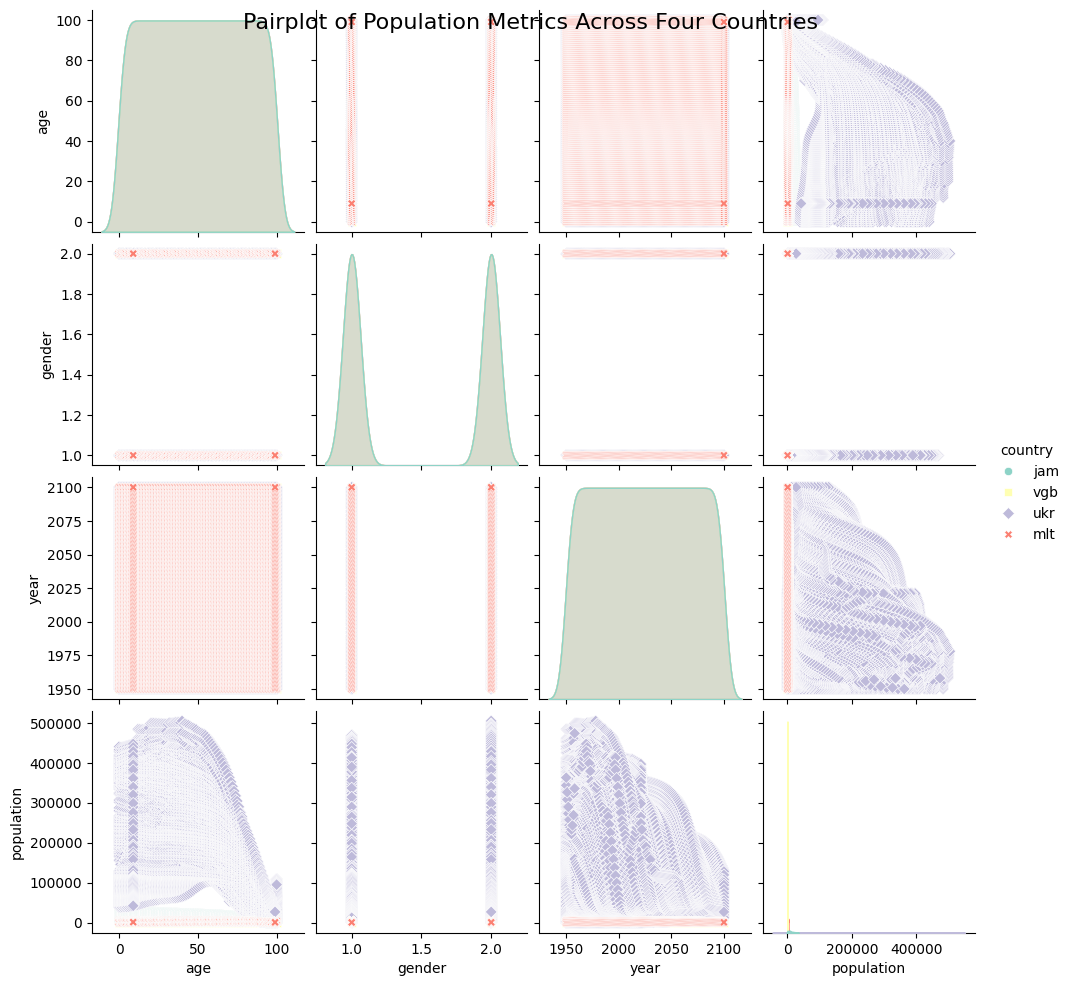

In [202]:
# Select the four countries we are comparing
selected_countries = ['mlt', 'jam', 'ukr', 'vgb']

# Make sure only use the 4 countries we are comparing
data_pairplot = full_data[full_data['country'].isin(selected_countries)]

# Create the pairplot
sns.pairplot(data_pairplot, hue='country', palette='Set3', diag_kind='kde', markers=['o', 's', 'D', 'X'])

# Create the title for the plot
plt.suptitle('Pairplot of Population Metrics Across Four Countries', fontsize=16)

plt.show()


The pairplot revealed a couple points:
1. UKR has a much greater population than all other countires across all age groups.
2. MLT seems to have a very low population from 1950 to 2100, especially compared to other countires.
3. UKR has more gender 2 than 1.
4. UKR is suffering a severe population drop from 500000 in 1950 to about 150000 in 2100.

### Using plotnine

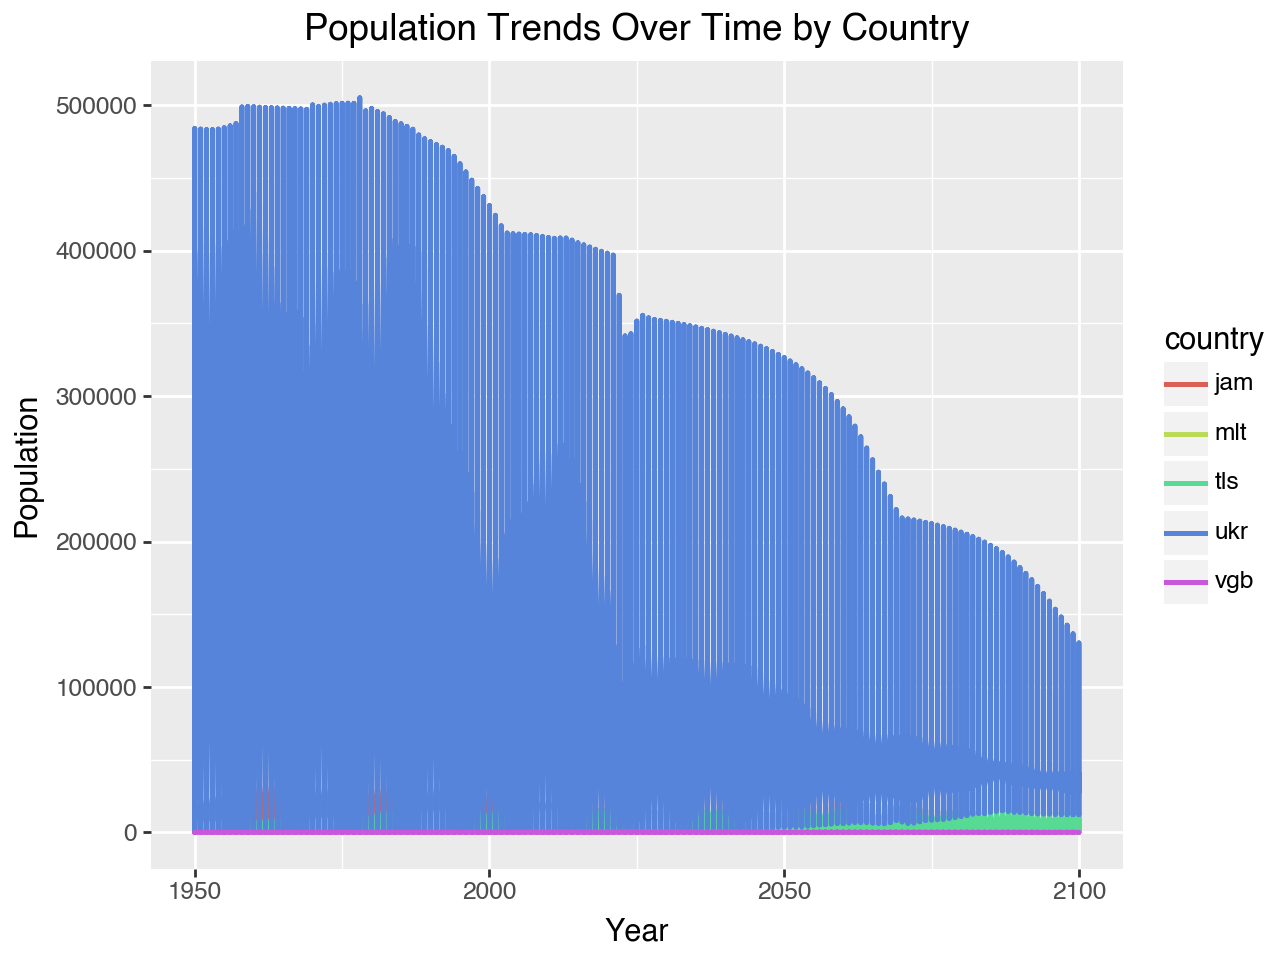

In [ ]:
# Creation of the plotnine
plot = (
    # Use ggplot to initialize plotnine
    ggplot(full_data, aes(x='year', y='population', color='country', group='country')) +
    geom_line(size=1) +  
    # Labels and title
    labs(
        title='Population Trends Over Time by Country',
        x='Year',
        y='Population'
    )

)
plot.show()